# What is Specialties

## What is this notebook about?

In this explanation, I want to clearly discuss what is Specialties. Inside QCommerce, we have different busienss units as Retail, Groceries, MFCs... Inside Groceries, there is a subtype on QCPartners that is attributed to Specialties. In common words, these are stores that are usually more unique and niche, stores that are not big Supermarket chains, or Convinience stores... 

I.E: Specialties stores can cover partners such as Butcheries, Fisheries, Gourmet supermarkets, Bakeries,...

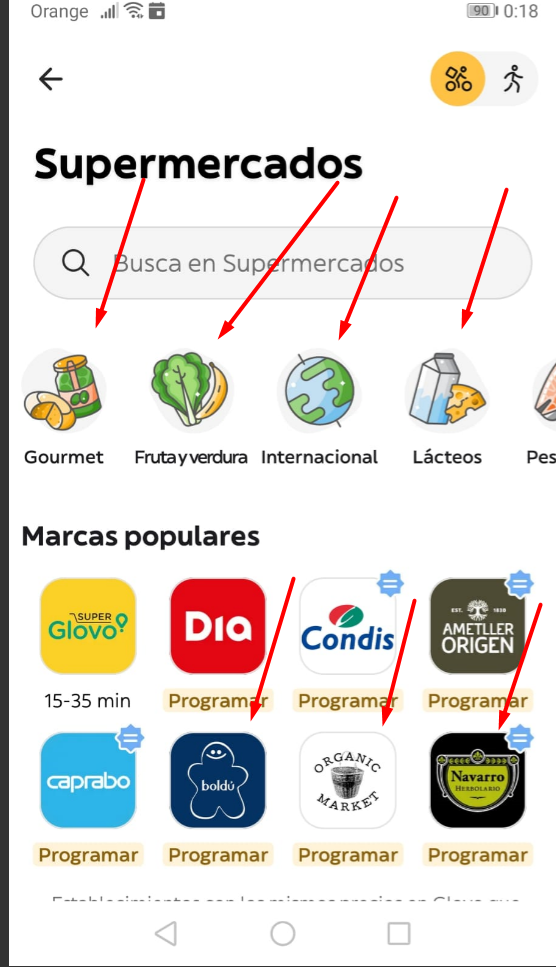
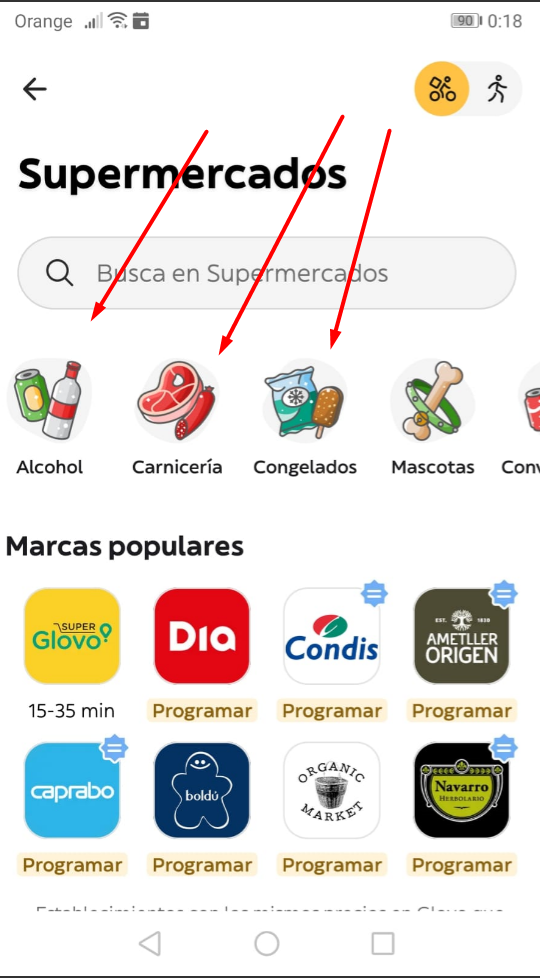
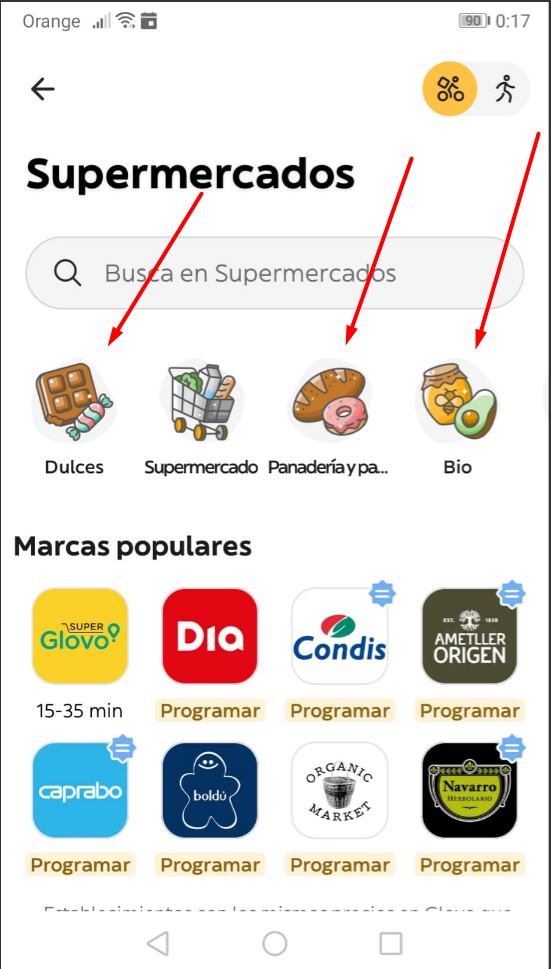

**Business questions answered:**

- **How do we define Specialties?** --> Answered in section
- **How many Specialties stores are there?** --> There are up to 7,693 specialties stores ids
- **How are Specialties stores distributed accross countries?** --> Mostly in Italy and Spain. Answered in section

## Config

In [39]:
import matplotlib.pyplot as  plt
# import numpy as np
import pandas as pd
# import seaborn as sns
import sys

sys.path.append('c:\\Users\\Jordi Cremades\\Documents\\Repos\\central-node')

# from utils import dataset_meta_stats
# from utils import dataset_stats
from utils import query_engines

# dms = dataset_meta_stats.DatasetMetaStats() 
# ds = dataset_stats.DatasetStats()

## [X] How do we define Specialties

For stores, we use different verticals, subverticals and finally sub-business units to identify the type of store. The Specialties stores all comply with the following conditions:

- Store Vertical --> QCommerce
- Store Sub Vertical --> QCPartners
- Store Sub Vertical 2 --> Groceries
- Store Sub Vertical 3 --> Sub-Vertical 3
- Store Sub Business Unit that is not: SUPERMARKET, CONVENIENCE or OTHER

So at the end we can have the following Sub Business Units ([link](https://glovoapp2.cloud.looker.com/explore/partners_dm/active_partners?qid=CaWdGLJ40YTg16MUPSB5u9)):

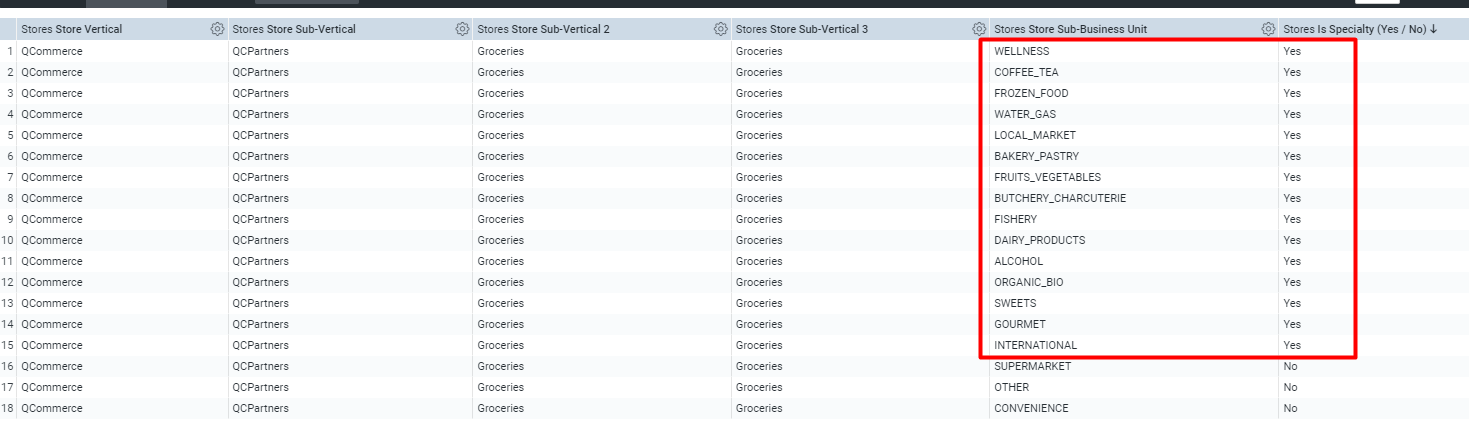
    

## [X] Develop a query to identify all current Specialties Stores

In [30]:
q = query_engines.QueryEngines(
    query='specialties.sql', 
    params=None,
    load_from_output_file=None, #with no .csv
    output_file=None, #with no .csv
    printq=None
)

df = q.query_run_starbust()

c:\Users\Jordi Cremades\Documents\Repos\central-node\utils\query_engines.py:162: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/5f561e5ece4ac655974e994d474857421497e6515fb4e93dc13e7b5a8e3bd6b0


## [X] How many Specialties stores are there?

In [33]:
q = query_engines.QueryEngines(
    query='how_many_specialties_store_are_there.sql', 
    params=None,
    load_from_output_file=None, #with no .csv
    output_file=None, #with no .csv
    printq=None
)

df = q.query_run_starbust()

c:\Users\Jordi Cremades\Documents\Repos\central-node\utils\query_engines.py:162: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/9ab739b4eae59420da0aca39baa715c378e1aa15ed0a24fe1ec345f30ea9435e


## [X] How are Specialties stores distributed accross countries?

We want to understand how the 7K almost 8K specialties stores distribute accross the different countries. My assumption is that more than a half will be in Spain.

In [34]:
q = query_engines.QueryEngines(
    query='country_distribution_specialties.sql', 
    params=None,
    load_from_output_file=None, #with no .csv
    output_file=None, #with no .csv
    printq=None
)

df = q.query_run_starbust()

c:\Users\Jordi Cremades\Documents\Repos\central-node\utils\query_engines.py:162: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/eead121cea5fb028fccf86d6a9a69a66f21cc0a58667361757f90c80ceef9b99


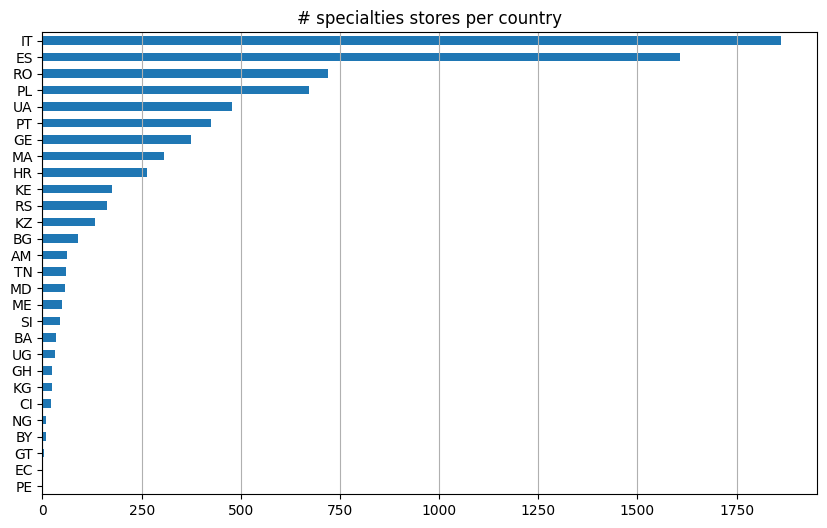

In [58]:
#group by stores
tmp_gropuby = df.groupby('country_code')['store_id'].nunique().reset_index()
tmp_gropuby.sort_values(by='store_id', ascending=True, inplace=True)

#horizontal plot
tmp_gropuby.plot(
    kind='barh', 
    x='country_code',
    y='store_id',
    legend=False, 
    figsize=(10, 6))
plt.title('# specialties stores per country')
plt.xlabel('')
plt.ylabel('')
plt.grid(True, axis='x')
plt.show()